In [1]:
from datascience import *
import numpy as np   
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

### Distributions

Two things make a distribution:
- Set of possible __values / events__ (i.e. 1,2,3,4,5,6)
- Set of __probabilities__ for those events (i.e. $\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6}$)

The above example with a single dice roll is known commonly as the __uniform distribution__ since each event has equal probability. Another common distribution you will see in this class is the __normal distribution__.

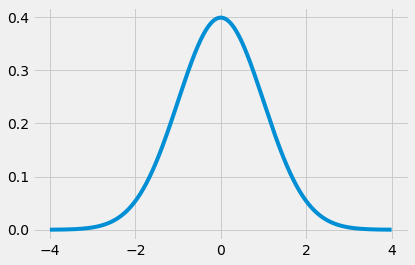

In [2]:
# You don't need to undersand this code
from scipy.stats import norm
r = np.arange(-4, 4, 0.001)
plots.plot(r, norm.pdf(r, 0, 1));

#### Discrete v. Continuous (not important)

- Discrete: Can you count the numbers, however long it would take (i.e. integers from 1 to infinity)
- Continuous: You can't count the numbers (i.e. all decimals between 0 and 1)

This distinction is not very important in this class, but worth knowing.

#### Empirical v. Probability (*very* important)

"empiric" = someone who relies solely on observation and experiment, NOT theory

- *Empirical Distribution*: what you observe __in real life / practice__ (i.e. you actually roll and count)
    - Distribution of a sample
    - Distribution of a simulation
    

- *Probability Distribution*: what you think will happen __in theory__ (i.e. uniform distribution) or the actual data of a __population__ (NOT sample)
    - Distribution of a population
    - Distrubtions in theory or what you expect
    
    
__BIG IDEA__: Law of Averages

Empirical Distributions $\to$ Probability Distributions __as the sample size / number of trials increases__

When you make your first three rolls, you might get three or less random numbers between 1 and 6. But over time, you would expect that each face appears just as often as the other. In other words, you expect the empirical distribution to approach the uniform distribution, which is the probability distribution of 1 dice roll.

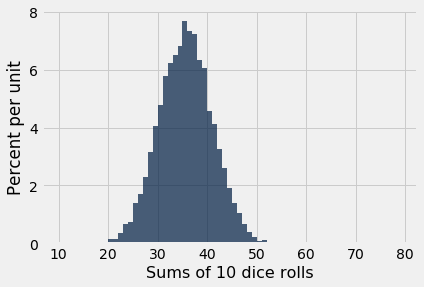

In [74]:
# Notice with large enough reps and num_rolls, this looks roughly normal!

NUM_ROLLS = 10
REPS = 10000
POPULATION = np.arange(1, 7)
sums = make_array()
for i in np.arange(REPS):
    sample = np.random.choice(POPULATION, size=NUM_ROLLS, replace=True)
    sums = np.append(sums, sum(sample))
tbl = Table().with_column("Sums of " + str(NUM_ROLLS) + " dice rolls", sums)
tbl.hist(bins=np.arange(1*NUM_ROLLS, 8*NUM_ROLLS, 1))


### Parameters, Statistics, and Parameter Estimation

- Parameter: Any value that can be calculated from a __population__
- Statistic: Any value that can be calculated from a particular __sample__ of a population
- Parameter Estimation

    Large enough sample $\overset{\text{L.O.A.}}{\sim}$ population 

    $\implies$ *Statistic* of large enough sample $\overset{\text{L.O.A.}}{\sim}$ *Parameter* of population

#### MOST COMMON MISTAKE:

Distribution of Sample $\neq$ Distribution of Sample Statistic

Distribution of Population $\neq$ Distribution of Population Parameter

When you simulate, you come up with an empirical distribution of the statistic you want, which looks like the probability distribution of the statistic you want. 

- Sometimes, these can seem like they are the same

    Distribution of the sum of one dice roll = Distribution of dice rolls


- Most of the time, they are different

    Distribution of sum of 10 dice rolls $\neq$ Distribution of dice rolls
    
This will especially be important when we get into the *Central Limit Theorem*, later on in this course.

#### Bias-Variance Tradeoff

- Bias-Heavy Statistics: 
    1) tend to either always overestimate or always underestimate (bias)
    2) More precise (smaller range of values)
    
- Variance-Heavy Statistics:
    1) tend to evenly estimate with high accuracy
    2) Less precise (larger range of values)
    
The precise reason why you would pick one or the other really depends on what the problem is and what statistics you have in mind. It also depends a lot on your own assumptions. However, you should be able to do is analyze whether a given statistic is more variance-heavy or more bias-heavy.

#### Total Variation Distance (CATEGORICAL STATISTIC)

Let `x_model` and `x_actual` be numpy arrays representing the __proportions__ of particular __categories__ within a population. Therefore, both represent __categorical data__.

The total variation distance is defined as:

`sum(abs(x_model - x_actual)) / 2`

For example, let's say you roll a dice 100 times and always get 6. Let's say you want to compute the total variation distance between your results and the expected results (uniform). Then:

`x_actual = make_array(0, 0, 0, 0, 0, 1)`

`x_model = make_array(1/6, 1/6, 1/6, 1/6, 1/6, 1/6)`

`>>> sum(abs(x_model - x_actual)) / 2`

`5/6`

__Very Technical Note__: For those of you interested in what the TVD really means, it mathematically boils down to the largest distance between two probabilities assigned to the same event (i.e. in the above case, our largest distance is $1 - \frac{1}{6} = \frac{5}{6} =$ TVD). Why we use this is extremely out of scope.

### (General) Hypothesis Testing

Based on a particular __model__ (i.e. our coin produces 50% heads and 50% tails, 2% of voters support our current president, 80% of students despise the new CalCentral, etc.)

- Fundamental Question: Does our model make sense, given our observation (observed stat.)?
- Fundamental Assumption: If our data is __extremely unlikely__ to come from our model (in the top [p-value cutoff]% of extreme values, i.e. 5%), we assume our model is __incorrect__ (reject null). If not, we have __no idea__ whether our model makes sense or not (fail to reject null).

Important notes:
- We __fail to reject the null__, NOT accept the alternative
- Just because our observed statistic is among the most extreme values doesn't mean that our data could not have come from our model
    If I flipped 10 coins and got 10 heads, it's possible the coin could still be fair (since there's some probability of that happening) but the proportion of times that would happen is equal to our p-value cutoff. This is why the p-value cutoff is __the chance of a false positive__ (we say we reject when we shouldn't have).

#### Steps to Hypothesis Testing

0) See if the question asks for __distance__ or __direction__ (based on your belief)

    Distance: The coin is not fair.
    
    Direction: The coin produces more heads / more tails

1) State your hypotheses

    Null: There is nothing wrong with our model. Everything is due to random chance.
    
    Alt: Depends on distance v. direction

2) Figure out what your statistic should be

    Categorical: TVD
    
    Numerical: Pick a relevant one. If distance, do abs(stat - mean(stat)).

3) Generate the null distribution (prob. dist. of stat. under null hyp.)

    Other classes: assume normal (since they don't have computers!)
    
    This class: simulate! (see example below copied from above)

4) Make a conclusion

    Calculate your p-value:
    
    np.count_nonzero(stats >= observed_stats) / len(stats)
    
    If it is greater than the p-value cutoff, then fail to reject.
    
    If it is less than the p-value cutoff, then reject.
    
    Make sure to add context to your conclusion!

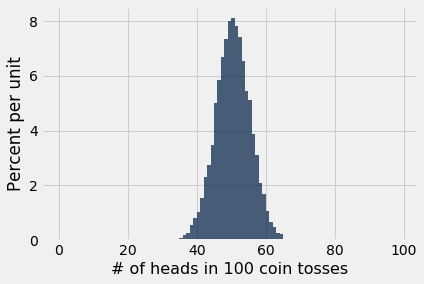

In [91]:
# Notice with large enough reps and num_rolls, this looks roughly normal!

NUM_ROLLS = 100
REPS = 10000
POPULATION = make_array(0,1)
sums = make_array()
for i in np.arange(REPS):
    sample = np.random.choice(POPULATION, size=NUM_ROLLS, replace=True)
    sums = np.append(sums, sum(sample))
tbl = Table().with_column("# of heads in " + str(NUM_ROLLS) + " coin tosses", sums)
tbl.hist(bins=np.arange(0*NUM_ROLLS, 1*NUM_ROLLS))

In [93]:
observed_stat = 10
p_value = np.count_nonzero(sums <= observed_stat) / len(sums)
p_value

0.0